### Problem Statement

 You have been provided with a dataset named **`"mushroom_classification.csv"`**, which includes various features of mushrooms to predict whether they are edible or poisonous. The dataset comprises the following columns:

- `cap_diameter:` The diameter of the mushroom cap.
- `cap_shape:` The shape of the mushroom cap, encoded as integers.
- `gill_attachment:` The attachment of the gills, encoded as integers.
- `gill_color:` The color of the gills, encoded as integers.
- `stem_height:` The height of the mushroom stem.
- `stem_width` The width of the mushroom stem.
- `stem_color:` The color of the mushroom stem, encoded as integers.
- `season:` The season when the mushroom was found, encoded as float.
- `class:` The classification of the mushroom, where 0 indicates edible and 1 indicates poisonous.

Your task is to use this dataset to build and evaluate a binary classification model to classify mushrooms as edible or poisonous. You will start with basic models and gradually move towards advanced models like Gradient Boosting. Finally, you will explore various parameters of the Gradient Boosting model to enhance performance.

**Dataset credits:** Prisha Sawhney (https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset/data)

**Import Necessary Libraries**

In [5]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



### Task 1: Data Preparation and Exploration

1. Import the data from the `"mushroom_classification.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.

In [2]:
# Step 1: Import the data from the "mushroom_classification.csv" file and store it in a variable 'df'
df = pd.read_csv("datasets\\mushroom_classification.csv")

# Step 2: Display the number of rows and columns in the dataset
print(df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
df.sample(7)

(54035, 9)


,cap_diameter,cap_shape,gill_attachment,gill_color,stem_height,stem_width,stem_color,season,class
37845,640,6,1,11,0.068069,675,12,0.888450,1
25456,806,2,6,5,0.170671,1182,11,0.943195,1
21929,931,6,0,10,2.291472,3005,11,0.943195,1
41463,452,6,6,5,0.540717,348,11,0.888450,0
19565,345,6,0,1,0.704707,636,1,0.943195,0
49466,998,2,1,11,1.528357,1407,11,1.804273,0
22791,316,6,6,10,0.322724,662,11,0.943195,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap_diameter     54035 non-null  int64  
 1   cap_shape        54035 non-null  int64  
 2   gill_attachment  54035 non-null  int64  
 3   gill_color       54035 non-null  int64  
 4   stem_height      54035 non-null  float64
 5   stem_width       54035 non-null  int64  
 6   stem_color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [4]:
df.describe()

,cap_diameter,cap_shape,gill_attachment,gill_color,stem_height,stem_width,stem_color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


### Task 2: Exploratory Data Analysis (EDA)

1. Perform a group-by operation on the target class and calculate the mean of the following features: `cap_diameter, stem_height, and stem_width`.
2. Visualize the distribution of these features using box plots.

In [8]:
# Step 1: Perform a group-by operation on the target class and calculate the mean of specific features
g = df.groupby("class")[['cap_diameter', 'cap_shape','gill_attachment'	,'gill_color'	,'stem_height'	,'stem_width'	,'stem_color'	,'season']].mean()
g

,cap_diameter,cap_shape,gill_attachment,gill_color,stem_height,stem_width,stem_color,season
class,,,,,,,,
0,633.064696,4.318268,2.271305,7.555378,0.627374,1208.915189,8.880131,0.980130
1,513.236293,3.739309,2.035956,7.144094,0.867251,921.516563,8.038753,0.929205


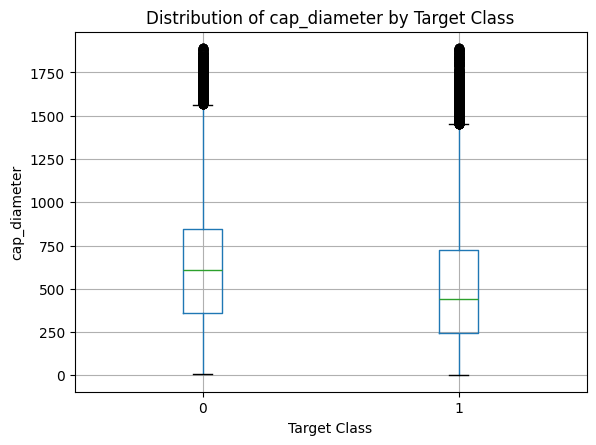

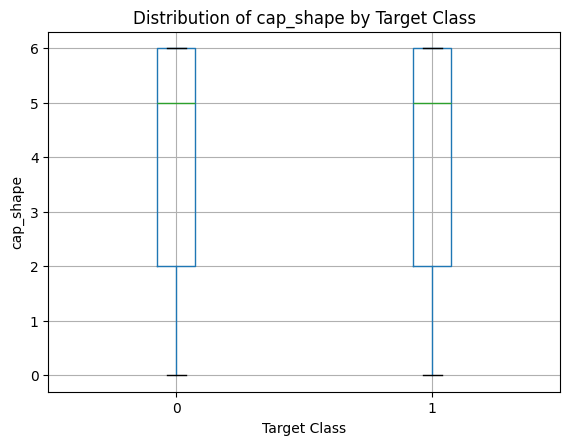

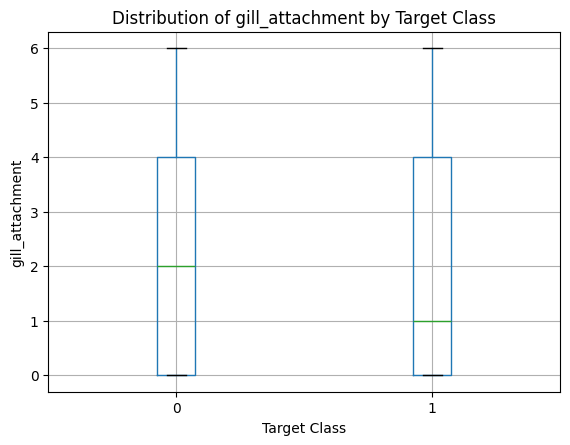

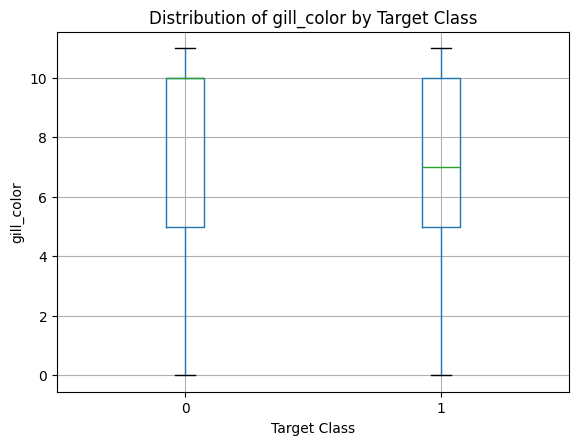

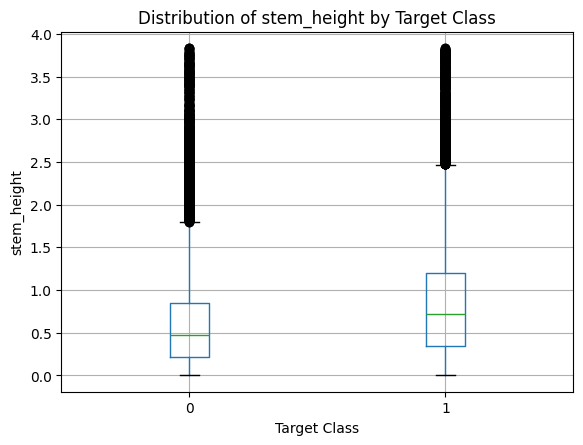

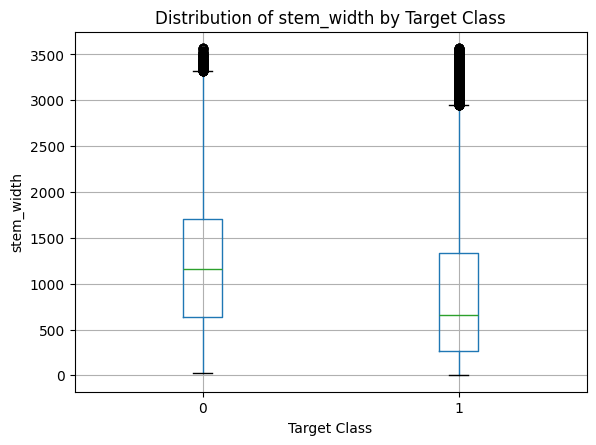

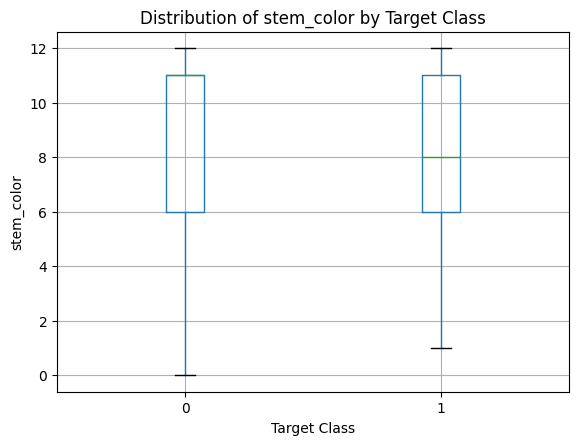

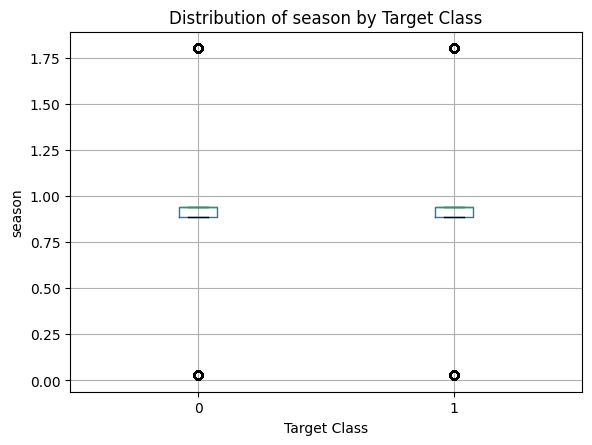

In [14]:
# Step 2: Visualize the distribution of these features using box plots
features = ['cap_diameter', 'cap_shape','gill_attachment'	,'gill_color'	,'stem_height'	,'stem_width'	,'stem_color'	,'season']
for f in features:
    df.boxplot(column=f, by='class')
    plt.title(f'Distribution of {f} by Target Class')
    plt.suptitle('')  # Suppress the default title to avoid overlap
    plt.xlabel('Target Class')
    plt.ylabel(f)
plt.show()

### Task 3: Model Training Using Basic Models

1. Select the features `(cap_diameter, cap_shape, gill_attachment, gill_color, stem_height, stem_width, stem_color, season)` and the target variable `(class)` for modeling.
2. Split the data into training and test sets with a test size of 25%.
3. Initialize and train a Logistic Regression model using the training data.
4. Make predictions on the test set using the trained model.
5. Evaluate the model using a classification report and print the report.
6. Initialize and train a Decision Tree Classifier model using the training data.
7. Make predictions on the test set using the trained model.
8. Evaluate the model using a classification report and print the report.

In [15]:
# Step 1: Select the features and target variable for modeling
X = df[['cap_diameter', 'cap_shape', 'gill_attachment', 'gill_color', 'stem_height', 'stem_width', 'stem_color', 'season']]
y = df["class"]

# Step 2: Split the data into training and test sets with a test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [21]:
# Step 3: Initialize and train a Logistic Regression model using the training data
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=500)
model_lr.fit(X_train, y_train)

# Step 4: Make predictions on the test set using the trained model
y_pred_lr = model_lr.predict(X_test)

# Step 5: Evaluate the model using a classification report and print the report
class_report_lr = classification_report(y_pred=y_pred_lr,y_true=y_test)
print(class_report_lr)
print("training score: ", model_lr.score(X_train,y_train))
model_lr.n_iter_

              precision    recall  f1-score   support

           0       0.61      0.54      0.57      6130
           1       0.65      0.72      0.68      7379

    accuracy                           0.64     13509
   macro avg       0.63      0.63      0.63     13509
weighted avg       0.63      0.64      0.63     13509

training score:  0.6339140304989389


array([443])

In [25]:
# Step 6: Initialize and train a Decision Tree Classifier model using the training data
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
# Step 7: Make predictions on the test set using the trained model
y_pred_dt = model_dt.predict(X_test)

# Step 8: Evaluate the model using a classification report and print the report
class_report_dt = classification_report(y_pred=y_pred_dt, y_true=y_test)
print(class_report_dt)
print("training score: ", model_dt.score(X_train,y_train))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6130
           1       0.98      0.98      0.98      7379

    accuracy                           0.98     13509
   macro avg       0.98      0.98      0.98     13509
weighted avg       0.98      0.98      0.98     13509

training score:  1.0


### Task 4: Model Training Using Gradient Boosting Classifier

1. Initialize and train a Gradient Boosting Classifier model using the training data.
2. Make predictions on the test set using the trained model.
3. Evaluate the model using a classification report and print the report.
4. Calculate and display the feature importances.

In [20]:
# Step 1: Initialize and train a Gradient Boosting Classifier model using the training data


# Step 2: Make predictions on the test set using the trained model


# Step 3: Evaluate the model using a classification report and print the report


In [21]:
# Step 4: Calculate and display the feature importances


### Task 5: Exploring Various Parameters in Gradient Boosting Classifier

1. Train a Gradient Boosting model with the following parameters:
    - learning_rate = 0.05
    - n_estimators = 150
    - max_depth=4
    - min_samples_split = 3
    - min_samples_leaf = 2

Learn about these parameters here: [scikit-learn GradientBoostingClassifier Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

-------------------------------------------------------------------------------------------------------------------------------------------------------
2. Evaluate the model using a classification report and print the report.

In [22]:
# Step 1: Train a Gradient Boosting model with specified parameters


# Step 2: Make predictions on the test set using the trained model


# Step 3: Evaluate the model using a classification report and print the report
